<a href="https://colab.research.google.com/github/BenJoyenConseil/transfer_digits/blob/main/MNIST_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sklearn pandas matplotlib seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Classic RF on MNIST

In [175]:
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

## Load data

In [ ]:
df = pd.read_csv('sample_data/mnist_train_small.csv')

In [ ]:
df.shape

(19999, 785)

In [ ]:
df_x=df.iloc[:,1:]
df_y=df.iloc[:,0]

## exploration

In [ ]:
def print_image(row, df):
    temp=df.iloc[row,:].values
    temp = temp.reshape(28,28).astype('uint8')
    plt.imshow(temp)

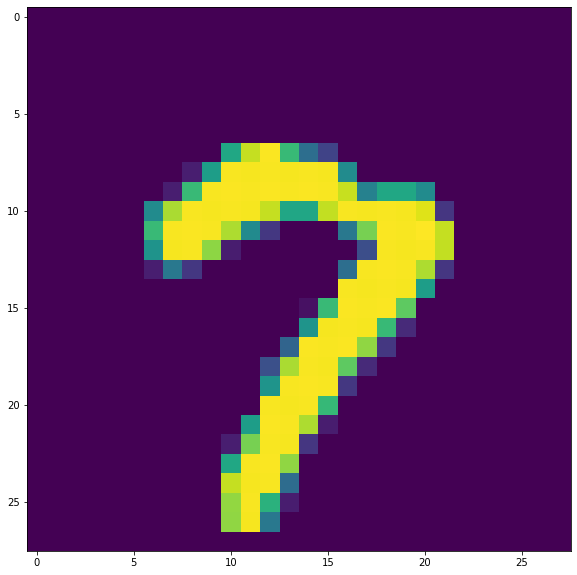

In [ ]:
plt.figure(figsize=(12,10))
print_image(10, df_x)

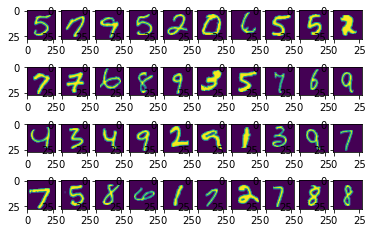

In [ ]:
for i in range(40):
    plt.subplot(4, 10, i+1)
    print_image(i, df_x)

1    2243
7    2126
6    2038
9    2023
3    2021
2    1989
0    1962
4    1924
8    1912
5    1761
Name: 6, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


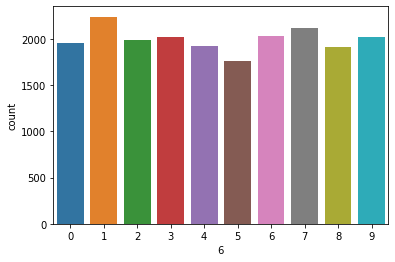

In [ ]:
print(df_y.value_counts())
sns.countplot(df_y)

## fit / predict

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, shuffle=True, random_state=123, train_size=1000)
print(train_x.shape)
print(test_x.shape)

(1000, 784)
(18999, 784)


In [ ]:
rf = RandomForestClassifier()
rf.fit(train_x, train_y)

RandomForestClassifier()

## Rapports

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1875
           1       0.89      0.98      0.93      2123
           2       0.90      0.88      0.89      1884
           3       0.90      0.87      0.88      1922
           4       0.89      0.85      0.87      1838
           5       0.91      0.76      0.83      1681
           6       0.94      0.92      0.93      1941
           7       0.95      0.90      0.92      2017
           8       0.86      0.88      0.87      1801
           9       0.78      0.89      0.83      1917

    accuracy                           0.89     18999
   macro avg       0.89      0.89      0.89     18999
weighted avg       0.89      0.89      0.89     18999



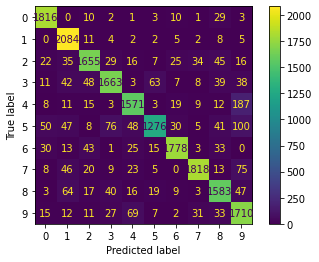

In [ ]:
ConfusionMatrixDisplay.from_predictions(test_y, rf.predict(test_x))
print(classification_report(test_y, rf.predict(test_x)))

# Skewed Learning

In [ ]:
y_column_name = "6"

In [ ]:
df_sorted = df.sort_values(by=y_column_name)

In [ ]:
nb_sample=8000
df_x_skewed, df_y_skewed = df_sorted.iloc[:nb_sample,1:], df_sorted.iloc[:nb_sample,0]

In [ ]:
rf.fit(df_x_skewed, df_y_skewed)

RandomForestClassifier()

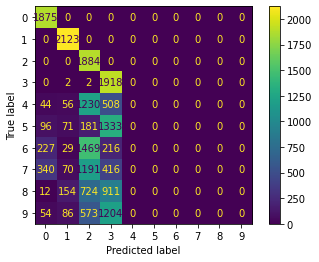

In [ ]:
ConfusionMatrixDisplay.from_predictions(test_y, rf.predict(test_x))

In [ ]:
print(classification_report(test_y, rf.predict(test_x)))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83      1875
           1       0.82      1.00      0.90      2123
           2       0.26      1.00      0.41      1884
           3       0.29      1.00      0.46      1922
           4       0.00      0.00      0.00      1838
           5       0.00      0.00      0.00      1681
           6       0.00      0.00      0.00      1941
           7       0.00      0.00      0.00      2017
           8       0.00      0.00      0.00      1801
           9       0.00      0.00      0.00      1917

    accuracy                           0.41     18999
   macro avg       0.21      0.40      0.26     18999
weighted avg       0.22      0.41      0.27     18999



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Approche Clustering

In [242]:
train_x_kmean, test_x_kmean, train_y_kmean, test_y_kmean = train_test_split(df_x, df_y)

In [243]:
from sklearn.cluster import MiniBatchKMeans

In [252]:
kmeans = MiniBatchKMeans(n_clusters=df_y.unique().size, )

In [253]:
kmeans.fit(train_x_kmean)

MiniBatchKMeans(n_clusters=10)

In [254]:
kmeans.cluster_centers_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [255]:
print(train_x_kmean.shape)
print(kmeans.labels_.shape)

(14999, 784)
(14999,)


In [256]:
def infer_cluster_labels(n_clusters, kmeans_labels, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    cluster_labels = {}

    # Loop through the clusters
    for i in range(n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans_labels == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the cluster_labels dictionary
        if np.argmax(counts) in cluster_labels:
            # append the new number to the existing array at this slot
            cluster_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            cluster_labels[np.argmax(counts)] = [i]
        
    return cluster_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [257]:
cluster_labels = infer_cluster_labels(kmeans.n_clusters, kmeans.labels_, train_y_kmean.to_numpy())
X_clusters = kmeans.predict(test_x_kmean)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(test_y_kmean.to_numpy()[:20])

[1 9 9 8 1 6 7 2 1 9 3 0 0 8 0 9 7 2 2 1]
[1 6 9 5 1 6 4 6 1 7 5 0 0 5 0 9 7 3 2 4]


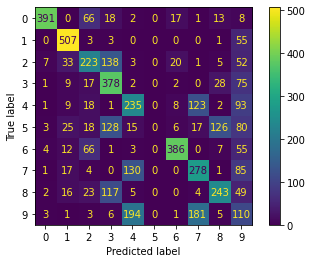

In [258]:
ConfusionMatrixDisplay.from_predictions(test_y_kmean, predicted_labels)

In [259]:
print(classification_report(test_y_kmean, predicted_labels))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84       516
           1       0.81      0.89      0.85       569
           2       0.51      0.46      0.48       482
           3       0.48      0.74      0.58       512
           4       0.40      0.48      0.44       490
           5       0.00      0.00      0.00       418
           6       0.88      0.72      0.79       534
           7       0.46      0.54      0.50       516
           8       0.56      0.53      0.55       459
           9       0.17      0.22      0.19       504

    accuracy                           0.55      5000
   macro avg       0.52      0.53      0.52      5000
weighted avg       0.54      0.55      0.54      5000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### PCA-reduced data kmeans

In [268]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10).fit(train_x_kmean)
kmeans_pca = MiniBatchKMeans(init=pca.components_, n_clusters=df_y.unique().size, n_init=1)
kmeans_pca = kmeans_pca.fit(train_x_kmean)

In [269]:
cluster_labels = infer_cluster_labels(kmeans_pca.n_clusters, kmeans_pca.labels_, train_y_kmean.to_numpy())
X_clusters = kmeans.predict(test_x_kmean)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(test_y_kmean.to_numpy()[:20])

[0 1 9 6 0 1 2 7 0 9 4 3 3 6 3 9 2 7 0 0]
[1 6 9 5 1 6 4 6 1 7 5 0 0 5 0 9 7 3 2 4]


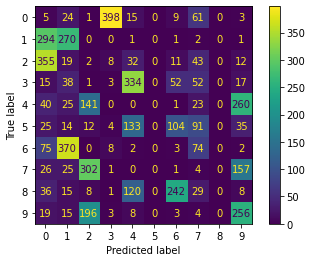

In [270]:
ConfusionMatrixDisplay.from_predictions(test_y_kmean, predicted_labels)

In [271]:
print(classification_report(test_y_kmean, predicted_labels))

              precision    recall  f1-score   support

           0       0.01      0.01      0.01       516
           1       0.33      0.47      0.39       569
           2       0.00      0.00      0.00       482
           3       0.01      0.01      0.01       512
           4       0.00      0.00      0.00       490
           5       0.00      0.00      0.00       418
           6       0.01      0.01      0.01       534
           7       0.01      0.01      0.01       516
           8       0.00      0.00      0.00       459
           9       0.34      0.51      0.41       504

    accuracy                           0.11      5000
   macro avg       0.07      0.10      0.08      5000
weighted avg       0.08      0.11      0.09      5000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
